In [1]:
#Classification - kisi ölmüs mü kalmis mi? sorusu cevap evet hayir

In [2]:
import pandas as pd

import warnings
warnings.simplefilter('ignore')

In [3]:
df1=pd.read_csv("ttrain.csv")

In [4]:
df2=pd.read_csv("ttest.csv")

In [5]:
# soru: train dosyasiyla modeli egitip test dosyasindaki verileri tahmin etmeniz gerekiyor
# basari orani kaggle verecek, basari orani kaggle yükleyecez
#kaggle > 0.40 basariyiz

# EDA - Exploratory Data Analaysis

In [6]:
df1.shape

(891, 12)

In [7]:
df2.shape # neden 11 sutun? bu kisi hayatta mi bilmiyoruz, Survived sutun yok

(418, 11)

In [8]:
df1.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S


In [9]:
df2.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
368,1260,1,"Gibson, Mrs. Leonard (Pauline C Boeson)",female,45.0,0,1,112378,59.4,NaN,C


In [10]:
# survived sutun dan modeli egitmemizi istiyor model
# ve olmayan sutunu tahin etmemizi istiyor
# ancak bu veri de bir problem var: bazi veriler eksik
# eksikleri nasil tamamliyacagiz?
# iki seyi birlestiriyoruz

In [11]:
df=df1.append(df2)

In [12]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
786,787,1.0,3,"Sjoblom, Miss. Anna Sofia",female,18.0,0,0,3101265,7.4958,NaN,S


In [13]:
df.shape

(1309, 12)

In [14]:
# bos yeri var mi yok mu? daha önce bos veri nasil doldurulu yapmadik
df.info()
#pclass 1. sinif mi 2. sinif mi 3. sinif mi
#SibSp gemi de kardesi var mi
#Parch gemi de ailesi var mi
#Fare ödedigi para
#embarked handi limandan bindi

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [15]:
df.isnull().sum() # 418 hayatta kaldi mi? soru bu, bunu tahmin edecegiz

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [16]:
# veri adedi (df.shape den bak) 1309/1014 (Cabin eksik aded) = 0,77 - verinin 77% bos
# bir sutun da veri 20% den fazlasi bos ise o sutunu silebilirz
# istedigimiz sonuca ulasamasak ve o sutuna illa ihtiyac varsa ekleyin

* bos veri doldurmanin 8 farkli yöntemi var
* 1 Mean - ortalama
* 2 Median - Orta Deger
* 3 En Yakin Komsu
* 4 Regression
* 5 Fforward
* 6 Bbackword
* 7 En uygun olani ile dolduruyor (all of the above)

In [17]:
# Fare'i doldurmaya baslayalim - rakam oldugu icin mesela mean veya median ile

In [18]:
df['Fare'].mean(),df['Fare'].max(),df['Fare'].min(),df['Fare'].std()

(33.2954792813456, 512.3292, 0.0, 51.75866823917414)

In [19]:
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [20]:
import seaborn as sns

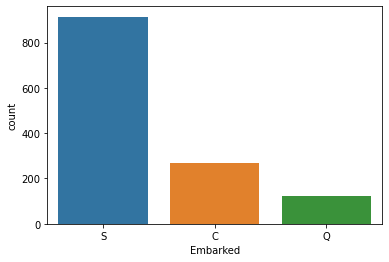

In [21]:
sns.countplot(x=df['Embarked']); # rakam degil yazi, en cok tekrar eden neyse onunla doldurma daha mantikli

In [22]:
df["Embarked"].mode() # mode en cok tekrar eden demek

0    S
Name: Embarked, dtype: object

In [23]:
df['Embarked'].value_counts(normalize=True)

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [24]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode)
# veya df['Embarked']=df['Embarked'].fillna("S") - bildigimiz icin

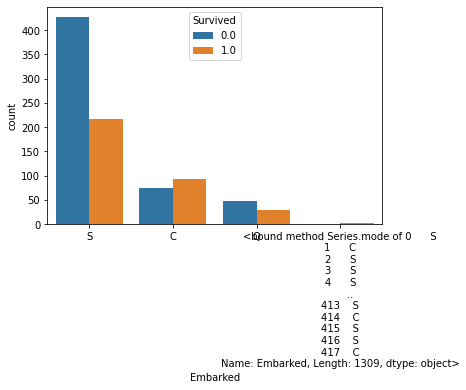

In [25]:
sns.countplot(x='Embarked',hue='Survived',data=df);

In [26]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [27]:
# cabin de 20% fazlazi bos diye silecegiz

In [28]:
del df['Cabin']
#df.drop(['Cabin'],axis=1,inplace=True) - burda 1 den fazla sutun silmek icin 'Cabin', 'Ticket', '..',..

In [29]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [31]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
304,305,0.0,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,S
165,1057,NaN,3,"Kink-Heilmann, Mrs. Anton (Luise Heilmann)",female,26.0,1,1,315153,22.0250,S
236,237,0.0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,S
708,709,1.0,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.5500,S
529,530,0.0,2,"Hocking, Mr. Richard George",male,23.0,2,1,29104,11.5000,S
285,286,0.0,3,"Stankovic, Mr. Ivan",male,33.0,0,0,349239,8.6625,C
293,294,0.0,3,"Haas, Miss. Aloisia",female,24.0,0,0,349236,8.8500,S
108,109,0.0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,S
336,1228,NaN,2,"de Brito, Mr. Jose Joaquim",male,32.0,0,0,244360,13.0000,S
228,229,0.0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13.0000,S


In [32]:
#Feature Engineering

In [33]:
#ünvan sutun ilave ediyoruz
        #df name icinde   cikart , boslugu ve noktada dur
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) 

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [35]:
del df['Name'] #Title var diye Name sutun cikabilir

In [36]:
df['Title'].unique() # Title'in icinde neler var

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [37]:
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

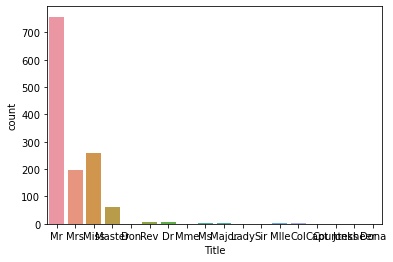

In [38]:
sns.countplot(x=df['Title']);

In [39]:
df['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [40]:
# 1 rakamlilari Mr. gibi seyler ekleyebiliriz, nasil yapacagiz?
#replace(neleri degis, nelerle degis)
df["Title"]=df["Title"].replace(["Ms","Mlle"],"Miss")
df["Title"]=df["Title"].replace(["Mme","Countess","Lady","Dona"],"Mrs")
df["Title"]=df["Title"].replace(["Rev","Jonkheer","Don","Sir","Major","Dr","Capt","Col"],"Mr")

In [41]:
df['Title'].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [42]:
df.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [43]:
# Kadinlarin ve Erkleklerin yas ortalamarini bulalim

In [44]:
# hangi gruplara göre topla?
# "Sex", cinsiyete göre topla, yasini bul, yasin ortalamasini al
df.groupby("Sex")["Age"].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [45]:
df[df['Age']<18]["Age"].mean() # 18 yas altindakilerin ortalamasi

9.101753246753248

In [46]:
            # Title'in icinden Age'i al, Age'in orta degeri ile doldur
df["Age"]=df["Age"].fillna(df.groupby("Title")["Age"].transform("median"))

In [47]:
df.isnull().sum() # artik bütün verilerimiz dolu. bos olan yok
#sadece tahmin etmemiz gereken 418 var

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [48]:
# bir de aile sayisi cok önemli - yine Feature Engineering

In [49]:
# gemideki kardes sayisini aliyoruz
# kardesleri + ailesi + 1(Kendisi) = Ailesinin büyüklügü
df["Family"]=df["SibSp"]+df["Parch"]+1
#aile olmasi hayatta kalmasi riskini arttiriyor

In [50]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,S,Mrs,2
4,5,0.0,3,male,35.0,0,0,373450,8.0500,S,Mr,1


In [51]:
# verilerde Passenger-Id'nin bir önemin olmadigini düsünüyoruz, Ticket de ayni
# lakin bir fark edecekse bir ilave ederek bakriz bir de silerek sonra mesela ilave ederek daha iyi oran cikti diye yazariz

In [52]:
# inplace=True df'ye yeni esitleme gerekmiyor yani bu aslinda df=df.drop...
df.drop(["PassengerId","Ticket"],axis=1,inplace=True)

In [53]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,2
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,2
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,1
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,2
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,1


In [54]:
# simdi yazilari rakamlara cevirmemiz lazim - ne yapiyoruz? --> get_dummies
# asil veriyi bozmamak icin data diyoruz

In [55]:
data=pd.get_dummies(df,drop_first=True)
#drop_first yerine drop_last da diyebiliriz

In [56]:
data.head() #sparse Matrix olustugunu görüyoruz - artik verimiz hazir

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,1,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,0,1,0,1,0


In [57]:
#train ve testi ayiriyoruz (basta birlestirdik veriyi hazir hale getirdik, simdi bölüyrouz)

In [58]:
#df'nin icersinden basi ne olursa olsun ilk 891 aliyoruz --> ttrain.csv de 891 satir sayisi vardi
train=data[:891]
#test icin 891'den basla ve kalani al
test=data[891:]

In [59]:
# y'ye yani hedefe survivor sutun icersini eklicez

In [60]:
y=train["Survived"]

In [61]:
# x'e de kalan sutunlari esitlestircez

In [62]:
x=train.drop("Survived",axis=1) # burda Survived'i silip diger hepsini ekliyor

# Deep Learning - Keras - Classification

In [63]:
#!pip install tensorflow

In [74]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#import tensorflow keras models
from tensorflow.keras.models import Sequential #bir siraya koymaya saglicak
from tensorflow.keras.layers import Dense 

In [65]:
x.shape

(891, 13)

In [66]:
y.shape

(891,)

In [67]:
model=Sequential()
model.add(Dense(8,activation='relu')) # Dense Layer eklemek = 1. Nüronun ikinci Layer'nin bütün nüronlarina baglanmasi
model.add(Dense(12,activation='relu')) # nüron sayisi arttirma basari orani arttiriyor
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # sonu 1 olmasi lazim ve classification oldugu icin sigmoid - output
model.compile(loss="binary_crossentropy",optimizer="adam", metrics="accuracy") #binary= 0 veya 1

In [68]:
model.fit(x,y,epochs=150,batch_size=10,verbose=1) 
# verbose asagdaki rakamlari gösteriyor, 0 da göstermiyor
#batch-size: bir seferde 10 satir aliyor, verinin bir kismini aliyor isliyor sonra digerini aliyor, degirmen gibi ögütüyür, veriyi isliyor yeni veri aliyor bölük bölük
#epoch= sokakta kac defa gidip geliyor

Epoch 1/150
90/90 [==============================] - 1s 531us/step - loss: 0.6910 - accuracy: 0.6105
Epoch 2/150
90/90 [==============================] - 0s 707us/step - loss: 0.6810 - accuracy: 0.6599
Epoch 3/150
90/90 [==============================] - 0s 702us/step - loss: 0.6706 - accuracy: 0.6779
Epoch 4/150
90/90 [==============================] - 0s 707us/step - loss: 0.6589 - accuracy: 0.6880
Epoch 5/150
90/90 [==============================] - 0s 702us/step - loss: 0.6517 - accuracy: 0.6902
Epoch 6/150
90/90 [==============================] - 0s 531us/step - loss: 0.6438 - accuracy: 0.7015
Epoch 7/150
90/90 [==============================] - 0s 532us/step - loss: 0.6431 - accuracy: 0.7048
Epoch 8/150
90/90 [==============================] - 0s 701us/step - loss: 0.6326 - accuracy: 0.7194
Epoch 9/150
90/90 [==============================] - 0s 707us/step - loss: 0.6263 - accuracy: 0.7217
Epoch 10/150
90/90 [==============================] - 0s 843us/step - loss: 0.6223 - accura

90/90 [==============================] - 0s 702us/step - loss: 0.4401 - accuracy: 0.8148
Epoch 82/150
90/90 [==============================] - 0s 707us/step - loss: 0.4293 - accuracy: 0.8215
Epoch 83/150
90/90 [==============================] - 0s 707us/step - loss: 0.4248 - accuracy: 0.8249
Epoch 84/150
90/90 [==============================] - 0s 702us/step - loss: 0.4298 - accuracy: 0.8171
Epoch 85/150
90/90 [==============================] - 0s 707us/step - loss: 0.4203 - accuracy: 0.8249
Epoch 86/150
90/90 [==============================] - 0s 718us/step - loss: 0.4280 - accuracy: 0.8193
Epoch 87/150
90/90 [==============================] - 0s 514us/step - loss: 0.4211 - accuracy: 0.8249
Epoch 88/150
90/90 [==============================] - 0s 538us/step - loss: 0.4150 - accuracy: 0.8238
Epoch 89/150
90/90 [==============================] - 0s 700us/step - loss: 0.4229 - accuracy: 0.8238
Epoch 90/150
90/90 [==============================] - 0s 712us/step - loss: 0.4125 - accuracy: 

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 12)                108       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 8)                 104       
                                                                 
 dense_4 (Dense)             (None, 6)                 54        
                                                                 
 dense_5 (Dense)             (None, 4)                 28        
                                                                 
 dense_6 (Dense)             (None, 2)                 1

In [70]:
scores=model.evaluate(x,y)

28/28 [==============================] - 0s 579us/step - loss: 0.3854 - accuracy: 0.8361


In [71]:
scores[0] # loss

0.38541439175605774

In [72]:
scores[1] # accuracy

0.8361391425132751

In [73]:
history=model.fit(x,y,epochs=19,validation_split=0.20,batch_size=10,verbose=1) 
# train test split yerine burda validation split -> test yerine validation kelimesi

Epoch 1/19
72/72 [==============================] - 0s 1ms/step - loss: 0.4073 - accuracy: 0.8174 - val_loss: 0.3083 - val_accuracy: 0.8939
Epoch 2/19
72/72 [==============================] - 0s 979us/step - loss: 0.4122 - accuracy: 0.8230 - val_loss: 0.3093 - val_accuracy: 0.8883
Epoch 3/19
72/72 [==============================] - 0s 886us/step - loss: 0.4125 - accuracy: 0.8216 - val_loss: 0.3117 - val_accuracy: 0.8771
Epoch 4/19
72/72 [==============================] - 0s 958us/step - loss: 0.4110 - accuracy: 0.8188 - val_loss: 0.3047 - val_accuracy: 0.8659
Epoch 5/19
72/72 [==============================] - 0s 880us/step - loss: 0.4105 - accuracy: 0.8230 - val_loss: 0.3136 - val_accuracy: 0.8827
Epoch 6/19
72/72 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy: 0.8188 - val_loss: 0.3320 - val_accuracy: 0.8603
Epoch 7/19
72/72 [==============================] - 0s 886us/step - loss: 0.4104 - accuracy: 0.8230 - val_loss: 0.3169 - val_accuracy: 0.8771
Epoch 8/19

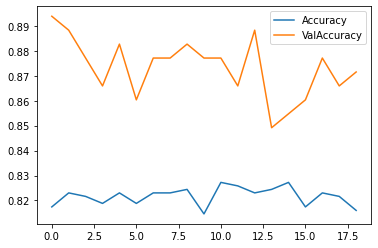

In [75]:
plt.plot(history.history["accuracy"],label="Accuracy")
plt.plot(history.history["val_accuracy"],label="ValAccuracy")
plt.legend();